In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import neighbors
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [41]:
df = pd.read_excel('../Data/Iris.xls')
print(df.info(), '\n----------')
print('Số dòng m =', df.shape[0])
print('Số dòng n =', df.shape[1], '\n----------')
print('Các cột:', df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None 
----------
Số dòng m = 150
Số dòng n = 5 
----------
Các cột: Index(['sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'species'], dtype='object')


In [42]:
print(df.species.value_counts())
print('\n----------------------------------------')

#Chia dữ liệu
iris_X = df[:][['sepallength','sepalwidth','petallength','petalwidth']]
iris_y = df[:]['species']

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

----------------------------------------


In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_y, test_size=50)

print("Training size: %d" %len(y_train))
print("Test size    : %d" %len(y_test))

Training size: 100
Test size    : 50


-------------------Trước khi sử lí dữ liệu---------------------------
Kết quả sau khi Test: 96.00 % với n_neighbors = 7


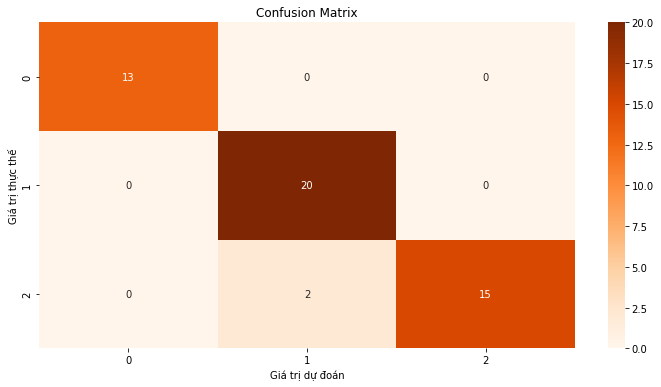

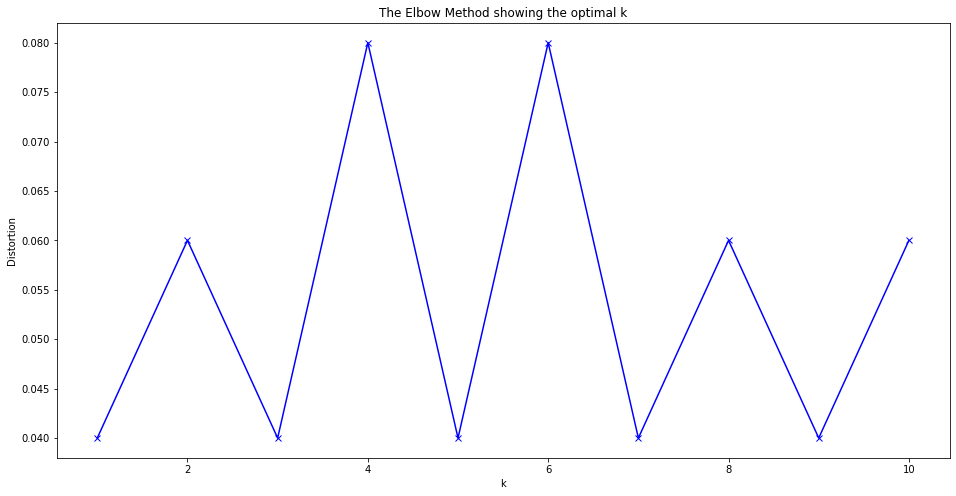

In [44]:

clf = neighbors.KNeighborsClassifier(n_neighbors = 7) #sửa n_neighbors


#Huấn luyện
clf.fit(X_train, y_train)

#Test
y_pred = clf.predict(X_test)
print("-------------------Trước khi sử lí dữ liệu---------------------------") 
print ("Kết quả sau khi Test: %.2f %%" %(100*accuracy_score(y_test, y_pred)),"với n_neighbors = 7")
#Confusion Matrix
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Oranges')
plt.ylabel("Giá trị thực thế")
plt.xlabel("Giá trị dự đoán")
plt.show()

#Eblow
distortions = []
K = range(1,11)
for k in K:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    distortions.append(np.mean(pred_i != y_test))    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()




---------------------------Sau khi sử lí dữ liệu---------------------------------
Kết quả sau khi Test: 94.00 % với n_neighbors = 7


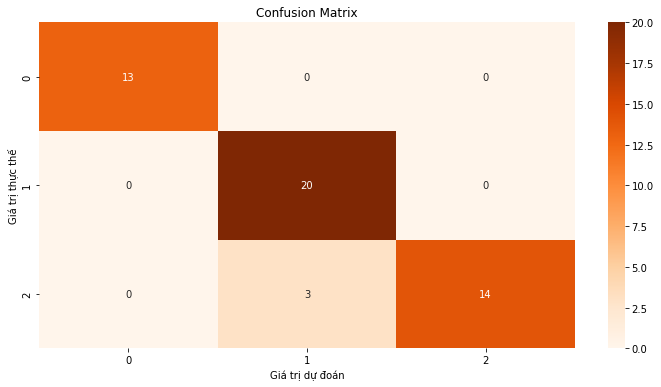

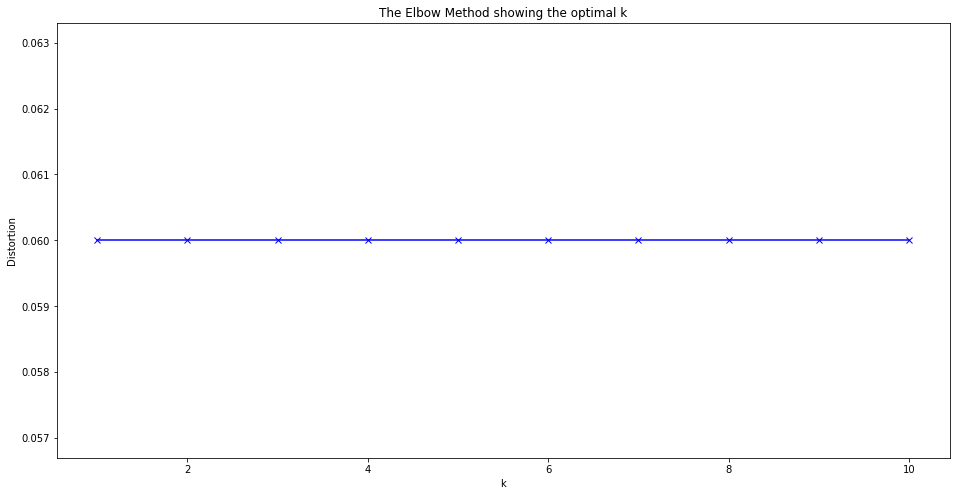

In [45]:
pipeline_knn = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=4)),
                    ('knn', neighbors.KNeighborsClassifier(n_neighbors=7))])
#Huấn luyện
pipeline_knn.fit(X_train, y_train)

#Test
y_pred2 = pipeline_knn.predict(X_test)
print("---------------------------Sau khi sử lí dữ liệu---------------------------------") 
print ("Kết quả sau khi Test: %.2f %%" %(100*accuracy_score(y_test, y_pred2)),"với n_neighbors = 7")
#Confusion Matrix
cm = confusion_matrix(y_test,y_pred2)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Oranges')
plt.ylabel("Giá trị thực thế")
plt.xlabel("Giá trị dự đoán")
plt.show()


#Eblow
distortions = []
K = range(1,11)
for k in K:
    pipeline_knn.fit(X_train, y_train)
    pred_i = pipeline_knn.predict(X_test)
    distortions.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()